# Supervised Machine Learning: Regression Task 6.4

## This script contains the following: 

### 1. Installing libraries and data

### 2. Cleaning data

### 3. Data preparation for regression analysis including scatterplots and pair plots 

### 4. Hypothesis development

### 5. Reshaping variables into NumPy arrays

### 6. Splitting data into two sets: a training set and a test set.

### 7. Running a linear regression

### 8. Creating a plot that shows the regression line on the test set and Interpretation of how well the line appears to fit the data

### 9. Checking the model performance statistics using MSE and R2 score

### 10. Comparing the predicted y values with the actual y values in a dataframe and discussion of how well the model performed on the test set

### 11. Extra - Removing extreme values and performing regression analysis 

## 1. Installing Libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
## Prompting matplotlib visuals to appear in the notebook
%matplotlib inline

## 1. Import Data 

In [5]:
## Importing data 
df_terror = pd.read_csv(r"C:\Users\bgros\Documents\Career Foundry\10-2023 Global Terrorism Analysis\02. Data\Clean Data\Clean_Terror_Data.csv", encoding = "ISO-8859-1", low_memory=True)

## 2. Question 3 - Clean your data so that it’s ready for analysis.

In [6]:
## Checking Column Names 
df_terror.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'latitude', 'longitude', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'multiple', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'natlty1_txt', 'gname', 'motive', 'guncertain1',
       'individual', 'nperps', 'nperpcap', 'claimed', 'weaptype1_txt',
       'weapsubtype1_txt', 'nkill', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'property', 'propextent_txt', 'ishostkid',
       'nhostkid', 'nhostkidus', 'hostkidoutcome_txt', 'nreleased', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [8]:
## Checking the shape 
df_terror.shape

(106158, 45)

In [9]:
## Checking for missing values 
df_terror.isnull().sum()

iyear                     0
imonth                    0
iday                      0
extended                  0
country_txt               0
region_txt                0
latitude                807
longitude               807
crit1                     0
crit2                     0
crit3                     0
doubtterr                 1
multiple                  1
success                   0
suicide                   0
attacktype1_txt           0
targtype1_txt             0
targsubtype1_txt          0
natlty1_txt               0
gname                     0
motive                    0
guncertain1             338
individual                0
nperps                10986
nperpcap               2747
claimed                   0
weaptype1_txt             0
weapsubtype1_txt          0
nkill                  3873
nkillus                 340
nkillter               2430
nwound                 7422
nwoundus                539
nwoundte               4101
property                  0
propextent_txt      

### I will leave missing values alone 

In [11]:
## Checking for duplicates 
dups = df_terror.duplicated()

In [1]:
## Checking data shape 
dups.shape

NameError: name 'dups' is not defined

### There are no duplicates 

## 3. Question 4 - Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

In [32]:
## Creating subgroup and removing missing values
sub = df_terror[['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']]
sub = sub.dropna()

In [33]:
## Consistency Checks 
sub.shape

(96317, 6)

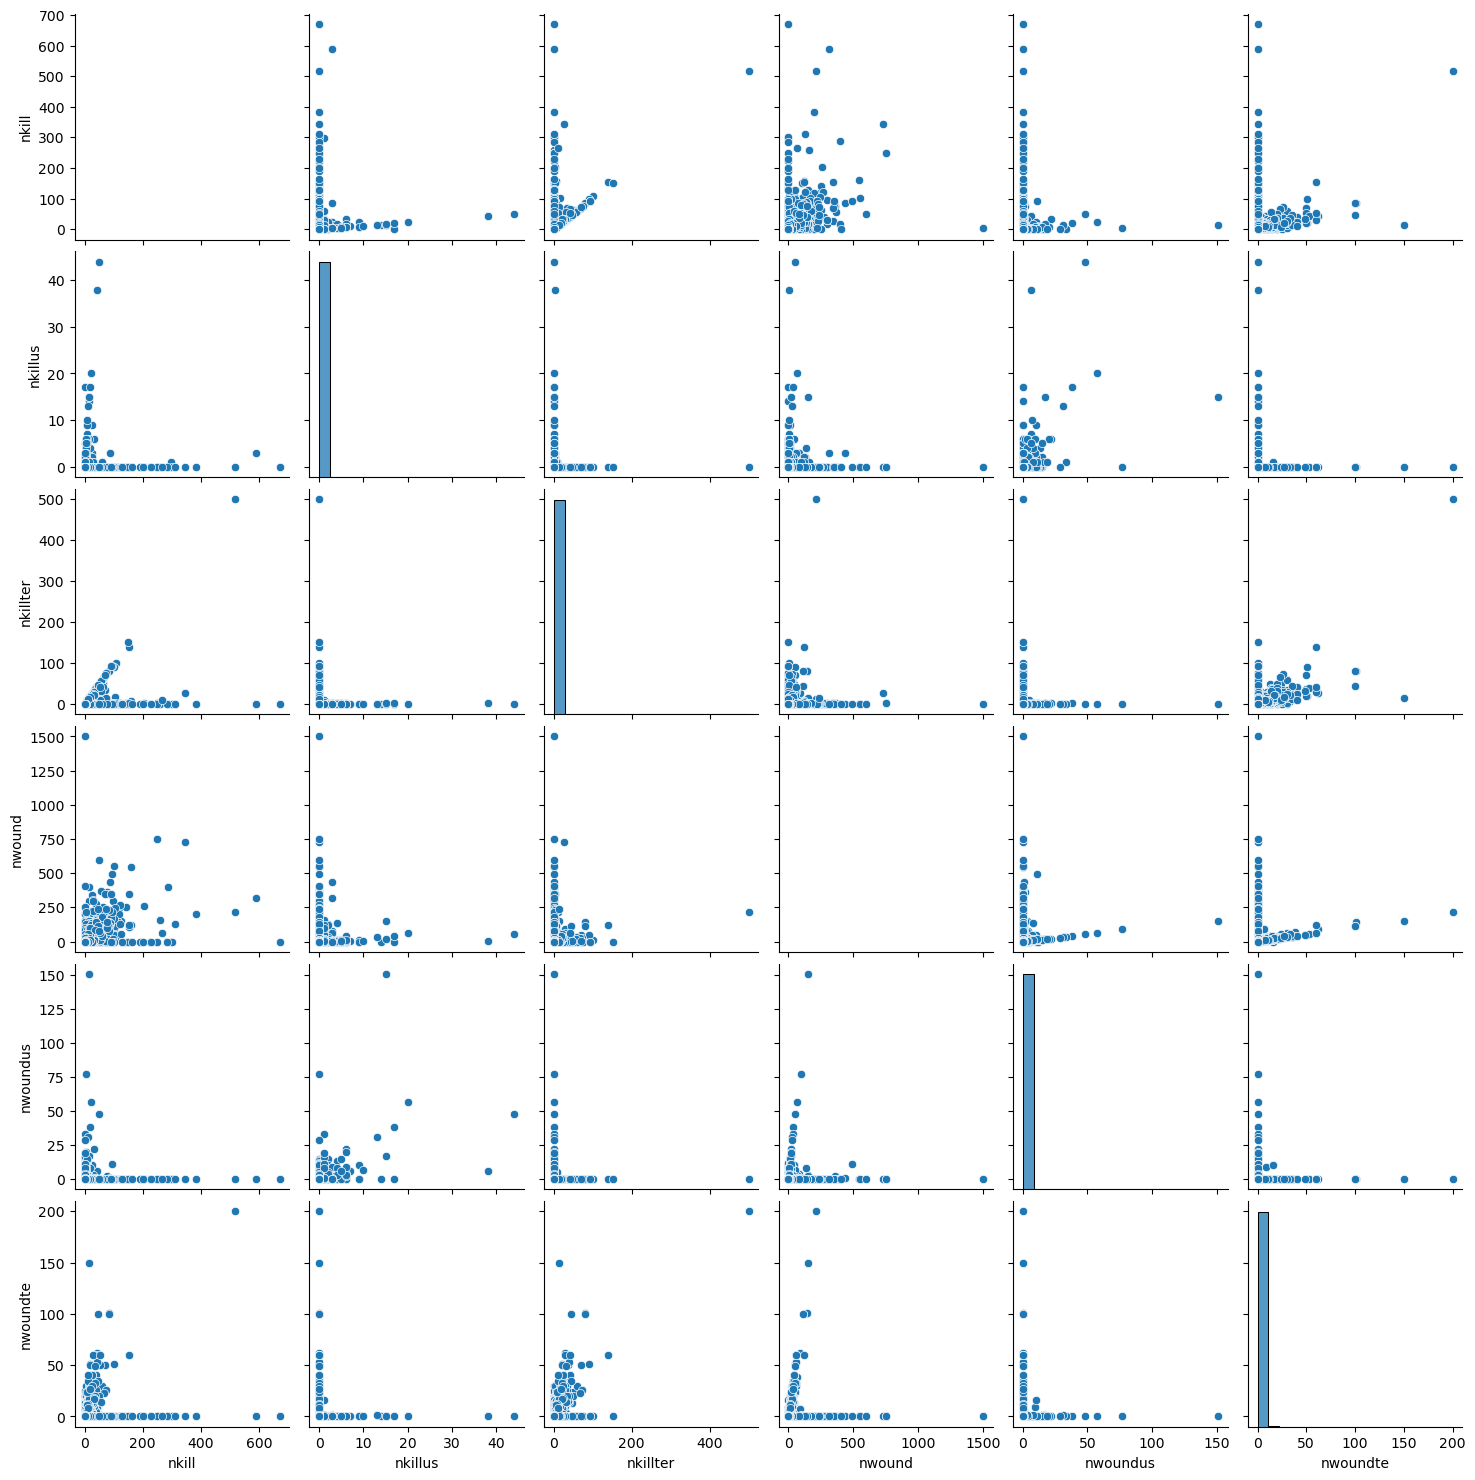

In [34]:
## Creating pair plot 
pair = sns.pairplot(sub)

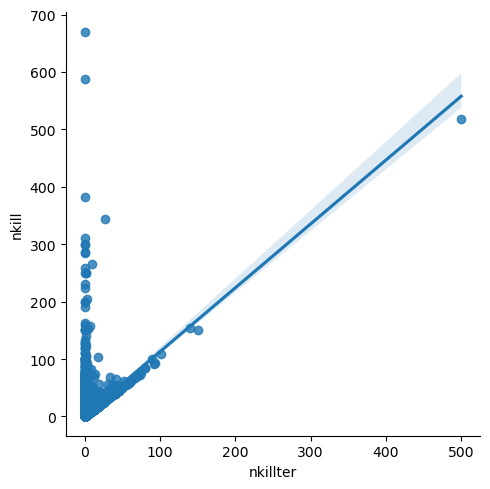

In [107]:
## Creating scatterplot 
sns.lmplot(x='nkillter', y='nkill', data = sub)

## 4. Question 5 - State your hypothesis in a markdown cell within your Jupyter notebook.

### Answer:
I hypothesize that as the number of perpertrators killed increases, so does the total number of people killed. 

## 5. Question 6 - Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [108]:
## Reshaping variables in arrays 
X = sub['nkillter'].values.reshape(-1, 1)
y = sub['nkill'].values.reshape(-1,1)

In [109]:
X

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

## 6. Question 7 - Split the data into two sets: a training set and a test set.

In [110]:
## Splitting into two data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

## 7. Question 8 - Run a linear regression on the data. First, fit the model you created to the training set. Then, create a prediction for y on the test set.

In [111]:
## Create a regression object
regression = LinearRegression()

In [112]:
## Fit regression object onto training data
regression.fit(X_train, y_train)

LinearRegression()

In [113]:
## Predict the values of y using X
y_predicted = regression.predict(X_test)

## 8. Question 9 - Create a plot that shows the regression line on the test set.

<function matplotlib.pyplot.show(close=None, block=None)>

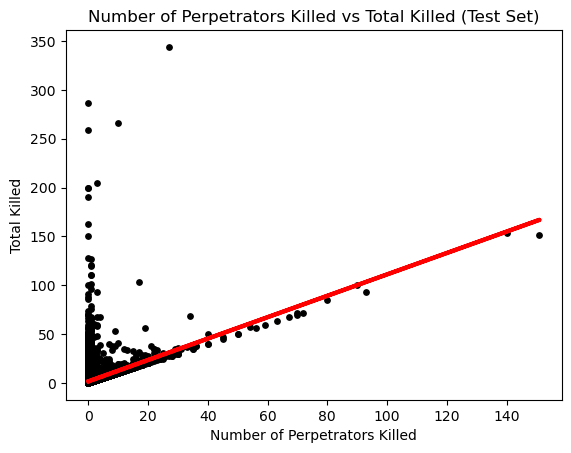

In [114]:
## Creating a plot on test set 
plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 3)
plot_test.title('Number of Perpetrators Killed vs Total Killed (Test Set)') 
plot_test.xlabel('Number of Perpetrators Killed')
plot_test.ylabel('Total Killed')
plot_test.show

## 8. Question 10 - Write your own interpretation of how well the line appears to fit the data in a markdown cell.

### Answer: 
The line fits well when the number of perpetrators killed is not zero. There are a lot of instances where there were no perpetrators killed but the total number of deaths is high and those do not fit the line.

## 9. Question 11: Check the model performance statistics—MSE and R2 score.

In [115]:
## Creating MSE and R2
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Mean squared error: 39.5954482815218
R2 score: 0.18027898998763803


### Answer: 
Mean squared error tells how close a regression line is to a set of points. The larger the distance, the farther away the regression line is from the data points, indicating that the regression line isn't an accurate representation of the data. A mean squared error of 39.6 is fair because my data set ranges from 0 to about 350. 

### Answer: R2 tells how well the model explains the variance in the data. Zero indicates a poor fit and 1 indicates a good fit. In my instance a R2 of 0.18 indicate a poor fit which means my model is not performing well. 

## 10. Question 12: Compare the predicted y values with the actual y values in a dataframe.

In [116]:
## Comparing y values with actual y values in dataset
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.0,1.644998
1,0.0,1.644998
2,2.0,1.644998
3,16.0,1.644998
4,6.0,7.118714
5,1.0,1.644998
6,0.0,1.644998
7,0.0,1.644998
8,1.0,1.644998
9,0.0,1.644998


## 10. Question 13: Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.

### Answer: 
My model performed poorly on the test set. It was off on most of the predictions. A large number of zeros and several instances where the number killed was high appears to have made it difficult for the model to learn. 

In terms of bias, the number of perpetrators killed could vary depending on the method that was used. For instance a planted bomb could kill zero perpetrators but lots of people. 

## 11. Extra: Removing extreme values and creating regression over again 

In [125]:
## Remove extreme values 
sub2 = sub[ (sub['nkillter'] < 400) & (sub['nkill'] < 200)]

In [126]:
## Reshape into arrays
X = sub2['nkillter'].values.reshape(-1, 1)
y = sub2['nkill'].values.reshape(-1,1)

In [127]:
## Split data into two sets: training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

In [128]:
## Create a regression object
regression = LinearRegression()

In [129]:
## Fit regression object onto training data
regression.fit(X_train, y_train)

LinearRegression()

In [130]:
## Predict the values of y using X
y_predicted = regression.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

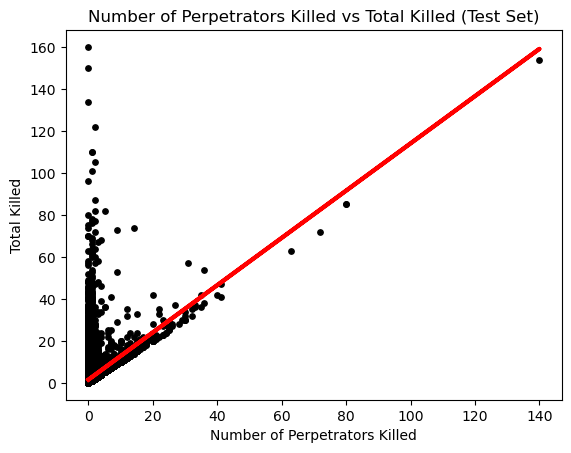

In [131]:
## Creating a plot on test set 
plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 3)
plot_test.title('Number of Perpetrators Killed vs Total Killed (Test Set)') 
plot_test.xlabel('Number of Perpetrators Killed')
plot_test.ylabel('Total Killed')
plot_test.show

In [132]:
## Creating MSE and R2
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Mean squared error: 22.85572828050735
R2 score: 0.19498466019987992


### The mean squared error improves but the R2 value does not. My model still performs poorly with extreme values removed.